<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/ESAA_YB_Week6_1007_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **앙상블 학습**

**앙상블 학습**을 통한 분류는 여러 개의 분유기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다.

(이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어나 성능을 나타내고 있다.)

앙상블 학습의 유형은 전통적으로 보팅, 배깅, 부스팅의 세가지로 나눌 수 있으며, 이 외에도 다양한 앙상블 방법이 있다.
- 보팅&배깅 : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
  - 차이점 : 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다.
  - 가장 태표적인 배깅 방식은 랜덤 포레스트 알고리즘이다.

개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 **부트스트래핑 분할 방식**이라고 부른다.

개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 **배깅 앙상블 방식**이다.

* 교차 검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다.

**보팅 유형 - 하드 보팅(Hard Voting) & 소프트 보팅(Soft Voting)**

[하드 보팅]
예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정한다.

[소프트 보팅]
분류기들의 레이블 값 결정 확률은 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다. => 일반적으로 사용됨



**보팅 분류기(Voting Classifier)**


In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VoingClassifier 학습, 예측, 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습, 예측, 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


보팅 분류기의 정확도가 조금 높게 나타났다.

# **랜덤 포레스트**
배깅의 대표적인 알고리즘으로 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있다.

**랜덤 포레스트**는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다.

In [9]:
import pandas as pd

# 중복된 피처 이름에 고유 번호를 붙여주는 함수
def get_new_feature_name_df(feature_name_df):
    feature_name_df_copy = feature_name_df.copy()
    # 특수 문자 제거 (괄호, 대시 등을 제거)
    feature_name_df_copy['column_name'] = feature_name_df_copy['column_name'].str.replace('[()]', '', regex=True).str.replace('-', '_')

    # 중복된 피처 이름 처리: 중복된 피처 이름에 숫자 접미사 추가
    feature_names = feature_name_df_copy['column_name']
    duplicates = feature_names[feature_names.duplicated(keep=False)]  # 중복된 이름 찾기
    counts = {}  # 이름별 중복 횟수 카운팅

    for idx, name in enumerate(feature_names):
        if name in counts:
            counts[name] += 1
            feature_names[idx] = f"{name}_{counts[name]}"  # 중복되면 접미사 붙이기
        else:
            counts[name] = 0  # 처음 등장한 경우 0으로 설정

    feature_name_df_copy['column_name'] = feature_names
    return feature_name_df_copy

def get_human_dataset():
  # 'features.txt' 파일에서 피처 이름을 불러옴
  feature_name_df = pd.read_csv('/content/features.txt',sep='\s+', header=None, names=['column_index', 'column_name'])

  # 피처 이름을 정리하는 함수 호출 (중복 해결)
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # 피처 이름을 리스트로 변환
  feature_name = new_feature_name_df['column_name'].values.tolist()

  # 학습 데이터와 테스트 데이터를 피처 이름을 칼럼으로 해서 불러옴
  X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블을 불러옴
  y_train = pd.read_csv('/content/y_train.txt',sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/y_test.txt',sep='\s+', header=None, names=['action'])

  return X_train, X_test, y_train, y_test

# 함수 실행
X_train, X_test, y_train, y_test = get_human_dataset()


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#원본 데이터를 재로딩, 테스트/트레인 데이터 분할
X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


**랜덤 포레스트 하이퍼 파라미터 및 튜닝**
- 트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다는 점이다.


---


[n_estimators] :  랜덤 포레스트에서 결정 트리의 개수를 지정하며 디폴드는 10개이다. 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니다.

[max_features] : 결정 트리에 사용된 max_features 파라미터와 같다. 그러나 RandomForestClassifier의 기본 max_features는 None이 아니라 auto(sqrt)와 같다.

In [32]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

#RandomForestClassifier  객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [33]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9199


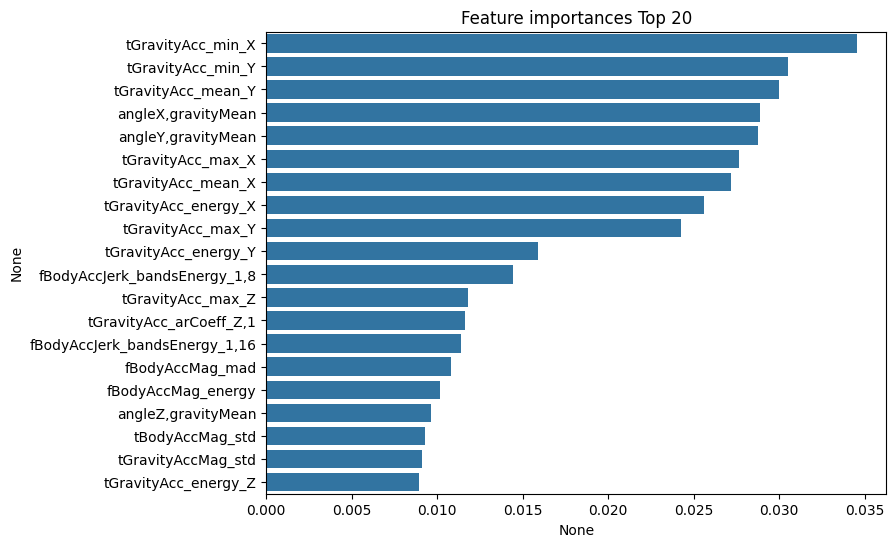

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importance_values = rf_clf1.feature_importances_
ftr_importance = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# **GBM(Gradient Boosting Machine)**

부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가증치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간:{0:.1f}초".format(time.time()-start_time))

GBM 정확도: 0.9386
GBM 수행 시간:1253.2초


앞의 랜덤 포레스트보다 나은 예측 성능을 나타낸다. -> 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많다.

**GBM 하이퍼 파라미터**
- loss() : 경사 하강법에서 사용할 비용 함수를 지정한다. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용한다.
- learning_rate() : GBM이 학습을 진행할 때마다 적용하는 학습률이다. Week learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수이다. 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1이다. 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높다. n_esetimators와 상호 보완적으로 조합해 사용하기도 한다.
- n_estimators : weak learner의 개수이다.기본값은 100
- subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율이다. 기본값은 1이며 이는 전체 학습 데이터를 기반으로 학습한다는 의미이다.


# **XGBoost(eXtra Gradient Boost)**

XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간 및 과적합 규제 부재 등의 문제를 해결해서 매우 각곽을 받고 있다.

특히 XGBoost는 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있다.

주요 장점으로는 뛰어난 예측 성능, GBM 대비 빠른 수행 시간, 과적합 규제, tree pruning, 자체 내장된 교차 검증, 결손값 자체 처리 등이 있다.

In [36]:
pip install xgboost==2.1.1

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier

**파이썬 래퍼 XGBoost 하이퍼 파라미터**

동일한 기능을 의미하는 하이퍼 파라미터이지만, 사이킷런 파라미터의 범용화된 이름 규칙에 따라 파라미터 명이 달라진다.

XGBoost 하이퍼 파라미터를 유형별로 나누면 **일반 파라미터 / 부스터 파라미터 / 학습 태스크 파라미터** 로 나눌 수 있다.

대부분의 하이퍼 파라미터는 Booster 파라미터에 속한다.

XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있다. 또한 XGBoost는 기본 GBM에서 부족한 다른 여러 가지 성능 향상 기능이 있다.

그 중에 수행 속도를 향상시키기 위한 대표적인 기능으로 조기 중단(early stopping) 기능이 있다.

In [38]:
import xgboost

print(xgboost.__version__)

2.1.1


**파이썬 래퍼 XGBoost - 위스콘신 유방암 예측**

In [39]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [40]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


1개의 양성 benign이 357개, 0값인 악성 malignant가 212개로 구성돼 있다.

In [41]:
#cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
#맨 마지막 칼럼이 Label임.Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

#위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


전체 569개의 데이터 세트에서 최종 학습용 409개, 검증용 46개, 테스트용 114개가 추출되었다.

In [42]:
#학습, 검증, 테스트 용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [43]:
params = { 'max_depth':3,
           'eta' : 0.05,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
           }
num_rounds = 400

- 트리의 최대 깊이(max_depth)는 3
- 학습률 eta는 0.1
- 예제 데이터가 0 또는 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binary:logistic)
- 오류 함수의 평가 성능 지표는 logloss
- num_rounds는 400회

In [44]:
#학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기한다
eval_list = [(dtr,'train'),(dval,'eval')]

#하이퍼 파라미터와 early stopping파라미터를 train()함수의 파라미터로 전
xgb_model = xgb.train(params = params , dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [45]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds 저장
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [48]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC:0.9965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

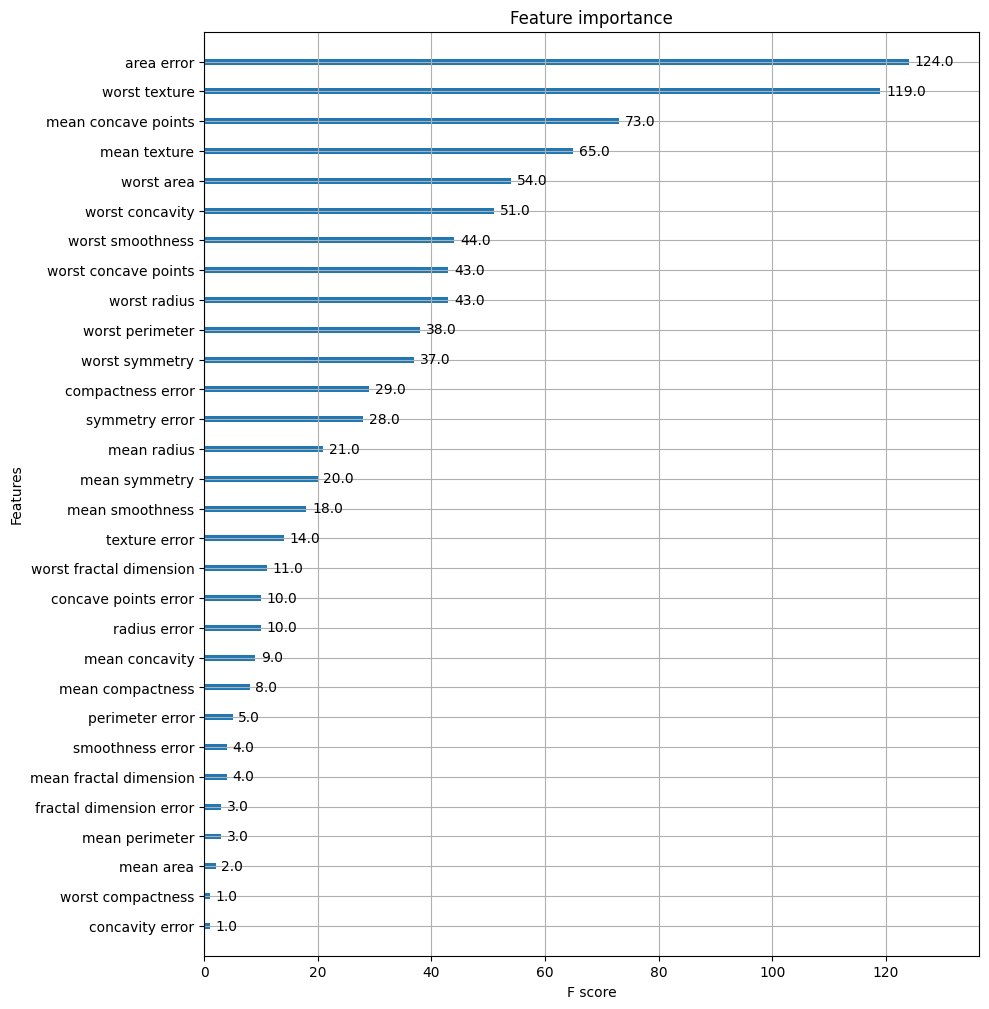

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

**사이킷런 래퍼 XGBoost의 개요 및 적용**

fit()과 predict()만으로 학습과 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리트를 그대로 사용할 수 있다.

In [50]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
eval_metric='logloss'
xgb_wrapper.fit(X_train, y_train,verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [51]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9954


In [54]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [55]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC:0.9965


In [58]:
#early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
evals=[(X_tr, y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

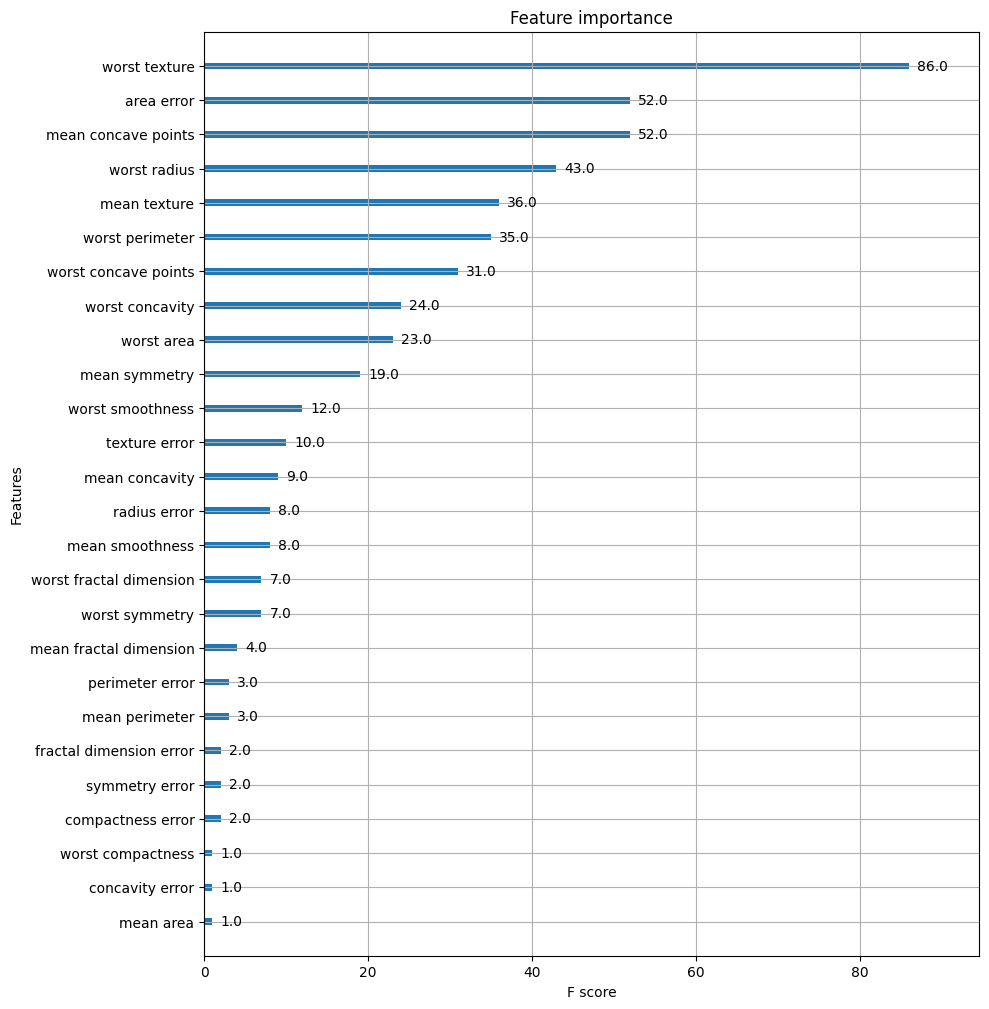

In [59]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
#사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)